# vector calculus

## dummy examples

In [ ]:
import torch
import matplotlib.pyplot as plt

torch.set_default_dtype(torch.float64)


In [ ]:
# R->R
# f(x) = x^2
x = torch.tensor(2.0, requires_grad=True)
f = x**2

f.backward()
x.grad   # at x = 2 the gradient of f(x) is 2x = 2*2 = 4

tensor(4.)

In [ ]:
# R^n -> R
# f(x1,x2) = x1^2 + 2x2

x1 = torch.tensor(2.0, requires_grad=True)
x2 = torch.tensor(3.0, requires_grad=True)

f = x1**2 + 3*x2

f.backward()
x1.grad, x2.grad

(tensor(4.), tensor(3.))

In [ ]:
# R^n -> R
# f(x1,x2) = x1^2 + 2x2
# x1 and x2 depend on t R -> R^2 (input t and output x1,x2)
t = torch.tensor(3.0, requires_grad = True)

x1 = 2*t
x2 = 3*t**3

f = x1**2 + 3*x2

f.backward()
t.grad

tensor(267.)

## Vector example

**f: R^3 -> R**

and

**x: R^2 -> R**

In [ ]:
# R^n -> R
# f(x1,x2,x3) = x1^2 + 2x2 + sin(x3)
# x1, x2, x3 depend on t and s R^2->R^3 (input t and s and output x1,x2,x3)
t = torch.tensor(3.0, requires_grad = True)
s = torch.tensor(4.0, requires_grad=True)

x1 = 2*t+s**3
x2 = 3*t**3/s
x3 = torch.sin(t)*s

f = x1**2 + 3*x2 + torch.sin(x3)

f.backward()
print("∂f/∂t =", t.grad.item())
print("∂f/∂s =", s.grad.item())

∂f/∂t = 337.40435249210566
∂f/∂s = 6704.931727621649


In [ ]:
# we can rewrite it as:
t = torch.tensor(3.0, requires_grad = True)
s = torch.tensor(4.0, requires_grad=True)
def f_of_ts(t,s):
    # R^2 -> R
    x1 = 2*t + s**3
    x2 = 3*t**3 / s
    x3 = torch.sin(t) * s
    return x1**2 + 3*x2 + torch.sin(x3)

J_f_ts = torch.autograd.functional.jacobian(f_of_ts, (t, s))
torch.stack(J_f_ts, dim = 0)
# ∂f/∂t, ∂f/∂s


tensor([ 337.4044, 6704.9317])

In [ ]:
# we can rewrite it as 2 parts, the jacobian from f to x and the jacobian from x to (t,s):
x1 = 2*t+s**3
x2 = 3*t**3/s
x3 = torch.sin(t)*s

def f_of_x(x1,x2,x3):
  # gradient
  return x1**2 + 3*x2 + torch.sin(x3)

J_f_x = torch.autograd.functional.jacobian(f_of_x, (x1,x2,x3))
J_f_x_ = torch.stack(J_f_x, dim = 0)
J_f_x_
# [∂f/∂x1, ∂f/∂x2 , ∂f/∂x3]
# 1x3

tensor([140.0000,   3.0000,   0.8449])

In [ ]:
t = torch.tensor(3.0, requires_grad=True)
s = torch.tensor(4.0, requires_grad=True)

def x_of_ts(t, s):
    # R^2-->R^3
    x1 = 2*t + s**3
    x2 = 3*t**3 / s
    x3 = torch.sin(t) * s
    return torch.stack([x1, x2, x3])  # vector R^3

J_x_ts = torch.autograd.functional.jacobian(x_of_ts, (t, s))
J_x_ts_ = torch.stack(J_x_ts, dim = 1)
J_x_ts_
# [∂x1/∂t , ∂x2/∂s]
# [∂x2/∂t , ∂x2/∂s]
# [∂x3/∂t , ∂x3/∂s]
# 3x2

tensor([[ 2.0000, 48.0000],
        [20.2500, -5.0625],
        [-3.9600,  0.1411]])

In [ ]:
# J_f_ts = torch.stack(J_f_x, dim = 0) @ torch.stack(J_x_ts, dim = 1) # 2x1
J_f_ts = J_f_x_ @ J_x_ts_
J_f_ts

# the result is exactly the same as the one we found before when we computed the jacobian directly for f_of_ts

tensor([ 337.4044, 6704.9317])

## viz

In [ ]:
n = 30
t_vals = torch.linspace(-n/2, n/2, n, dtype=torch.float64)
s_vals = torch.linspace(-n/2, n/2, n, dtype=torch.float64)

results = torch.zeros((n,n,2))
for i,ti in enumerate(t_vals):
  jacobian_row = []
  for j,sj in  enumerate(s_vals):
    ti = ti.clone().requires_grad_(True) # to avoid warning
    sj = sj.clone().requires_grad_(True) # to avoid warning
    J = torch.autograd.functional.jacobian(f_of_ts, (ti, sj))
    results[i][j] = torch.stack(J, dim=0) # [df/dt, df/ds]

results.shape


torch.Size([30, 30, 2])

Text(0.5, 0.92, 'derivative of f with respect to s - ∂f/∂s')

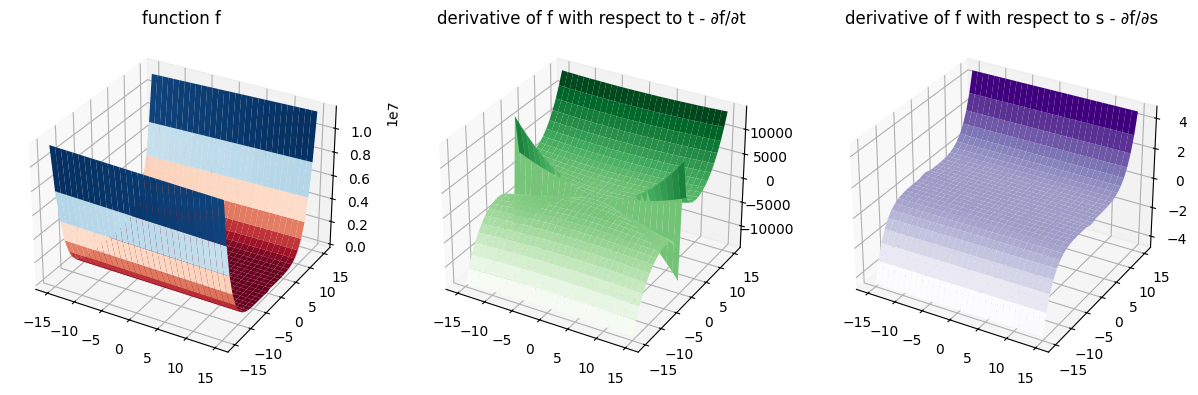

In [ ]:
fig, ax = plt.subplots(1,3, figsize = (15,15),subplot_kw={"projection": "3d"})

ax[0].plot_surface(*torch.meshgrid(t_vals,s_vals),f_of_ts(*torch.meshgrid(t_vals,s_vals)), cmap = "RdBu")
ax[1].plot_surface(*torch.meshgrid(t_vals,s_vals),results[:,:,0], cmap = "Greens")
ax[2].plot_surface(*torch.meshgrid(t_vals,s_vals),results[:,:,1], cmap = "Purples")

ax[0].set_title("function f")
ax[1].set_title("derivative of f with respect to t - ∂f/∂t")
ax[2].set_title("derivative of f with respect to s - ∂f/∂s")

# t and s are modifying the value of the function via x1,x2 and x3.

# let's see it working with R^n -> R^m

**f: R^n -> R^m**

and

**x: R^2 -> R**